# Predicting the housing prices using Linear Regressoin

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import wget
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\phula\Desktop\New folder\Housing.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
# summarize the data
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
cdf = df[['price','lotsize','bedrooms','bathrms','stories','airco']]
cdf.head(10)

,price,lotsize,bedrooms,bathrms,stories,airco
0,42000.0,5850,3,1,2,no
1,38500.0,4000,2,1,1,no
2,49500.0,3060,3,1,1,no
3,60500.0,6650,3,1,2,no
4,61000.0,6360,2,1,1,no
5,66000.0,4160,3,1,1,yes
6,66000.0,3880,3,2,2,no
7,69000.0,4160,3,1,3,no
8,83800.0,4800,3,1,1,no
9,88500.0,5500,3,2,4,yes


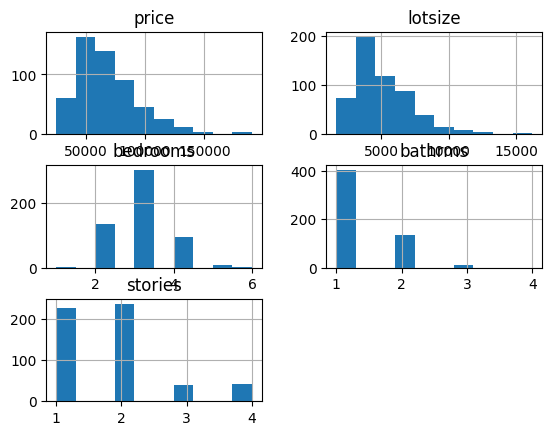

In [6]:
viz = cdf[['price','lotsize','bedrooms','bathrms','stories','airco']]
viz.hist()
plt.show()

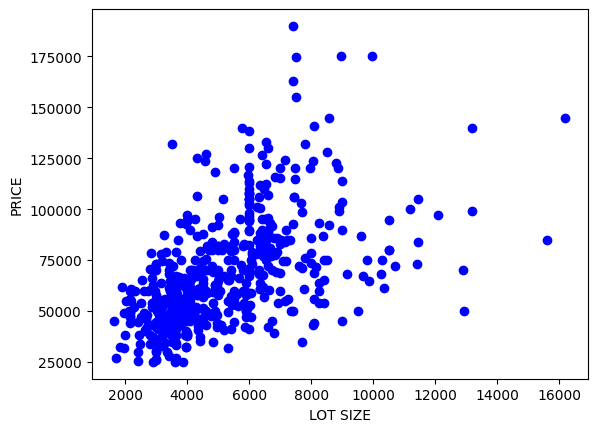

In [7]:
plt.scatter(cdf.lotsize, cdf.price, color='blue')
plt.xlabel("LOT SIZE")
plt.ylabel("PRICE")
plt.show()

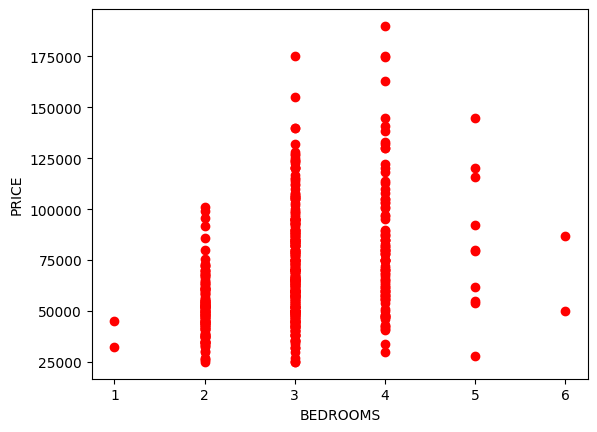

In [8]:
plt.scatter(cdf.bedrooms, cdf.price, color='red')
plt.xlabel("BEDROOMS")
plt.ylabel("PRICE")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

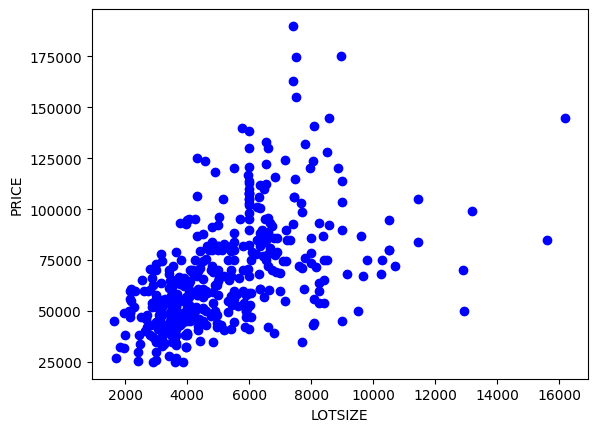

In [10]:
plt.scatter(train.lotsize, train.price, color='blue')
plt.xlabel("LOTSIZE")
plt.ylabel("PRICE")
plt.show()

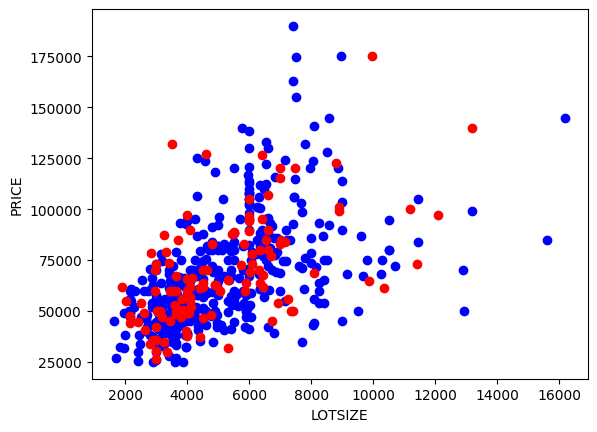

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.lotsize, train.price, color='blue')
ax1.scatter(test.lotsize, test.price, color='red')
plt.xlabel("LOTSIZE")
plt.ylabel("PRICE")
plt.show()

## Simple Linear Regression model:

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["lotsize"]])
train_y = np.asanyarray(train[["price"]])
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[6.59536565]]
Intercept:  [33803.58613482]


Text(0, 0.5, 'PRICE')

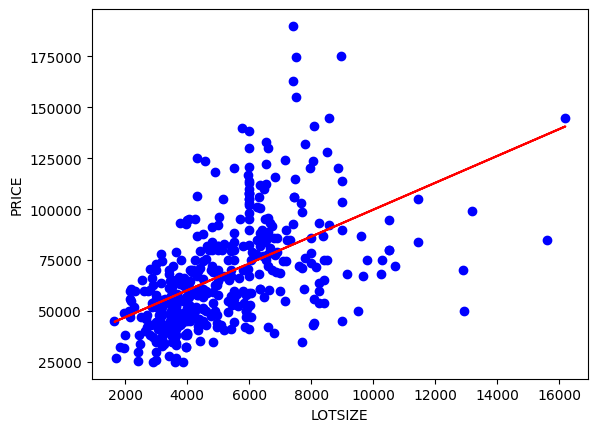

In [13]:
plt.scatter(train.lotsize, train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("LOTSIZE")
plt.ylabel("PRICE")

### Calculating the Error of the model:

In [14]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['lotsize']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print(f"Mean absolute error: {np.mean(np.absolute(test_y_ - test_y))}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_ - test_y))**2}")
print(f"R2-score: {r2_score(test_y , test_y_)}")

Mean absolute error: 15883.338680619021
Residual sum of squares (MSE): 2624646.353048257
R2-score: 0.317033406286248


## Multiple Linear regression model:

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['lotsize','bedrooms', 'bathrms', 'stories']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# The coefficients, and intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.24080396e+00 2.93895494e+03 1.75614617e+04 7.11685510e+03]]
Intercept:  [-3518.68840538]


### Calculating the Error of the model:

In [16]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['lotsize','bedrooms', 'bathrms', 'stories']])
test_y = np.asanyarray(test[['price']])
y_hat = regr.predict(test_x)

print(f"Mean absolute error: {np.mean(np.absolute(y_hat - test_y))}")
print(f"Residual sum of squares: {np.mean((y_hat - test_y)**2)}")
print(f"R2-score: {r2_score(test_y , y_hat)} ")

Mean absolute error: 12838.858794417409
Residual sum of squares: 298035027.60183537
R2-score: 0.556881284845603 
